# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


#Downloaded to Notebook Directory 
!curl. --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat
!curl. --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat


In [92]:
# Take a peek at the datasets
!head testt.txt
!head traim.txt

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [289]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = [list(map(int, instance.strip().split('\t')))]
        # Add a dummy input so that w0 becomes the bias
        instance = [[-1] + instance[0]]
        data += instance
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    
    product = 0
    for i in range(0, len(array2)):
        product = product + array1[i] * array2[i]
        return product



def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig
    #TODO: Return outpout of sigmoid function on x


# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    dp=0
    
    for i in range(0, len(weights)):
        dp = dp + instance[i] * weights[i]
        sigwi = 1 / (1 + math.exp(-dp))
    #TODO: return the output of the model 
    
    return sigwi

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    dp=0
   
    for i in range(0, len(weights)):
        dp = dp + instance[i] * weights[i]
    sigwit = 1 / (1 + math.exp(-dp))
    if sigwit>=0.5:
        label = 1
    else:
        label = 0
    #TODO: return the prediction of the model
    return label


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
           
            #TODO: name these steps -> in_value is the product of weights and instance, used to find the predicted output;
            #the activation function applied to the product. 
            #The error is then calculated by subtracting the output from the actual output provided.
            
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps -> weight generation and tuning is done using error from the subtraction of the predicted class from the actual class,

            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
            
    return weights

## Run it

In [299]:
instances_tr = read_data("traim.txt")
instances_te = read_data("testt.txt")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

##The weight cannot be adjusted appropriately if the predict function is used instead of the combination dot_product and sigmoid functions here




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [187]:
instances_tr = read_data("traim.txt")
instances_te = read_data("testt.txt")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate



for tr_size in tr_percent:
    for lr in lr_array:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learni

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



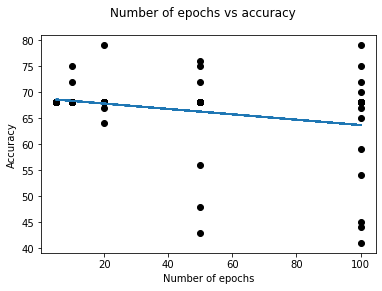

In [298]:
import matplotlib.pyplot as plt
import numpy as np
y=acclist 
x1=eplist
x2=trplist 
x3=lrlist
fig = plt.figure()
fig.suptitle('Number of epochs vs accuracy')
plt.plot(x1, y, 'o', color='black');
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy");
 
# converting list to array
x1 = np.array(x1)
m1, b1 = np.polyfit(x1, y, 1)

plt.plot(x1, m1*x1 + b1)
#m1*x1

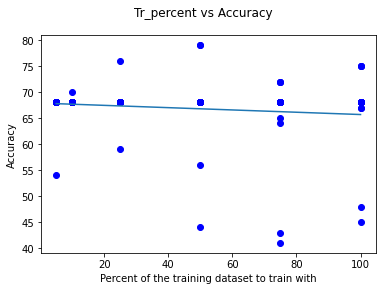

In [296]:
fig2 = plt.figure()
fig2.suptitle('Tr_percent vs Accuracy')
plt.xlabel("Percent of the training dataset to train with")
plt.ylabel("Accuracy");
plt.plot(x2, y, 'o', color='blue');
x2 = np.array(x2)
m2, b2 = np.polyfit(x2, y, 1)

plt.plot(x2, m2*x2 + b2)


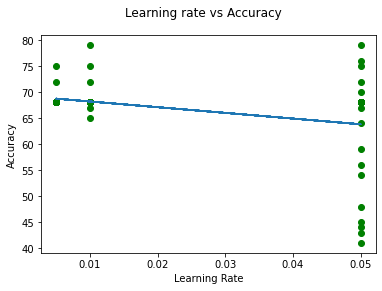

In [297]:
fig3 = plt.figure()
fig3.suptitle('Learning rate vs Accuracy')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy");
plt.plot(x3, y, 'o', color='green');
x3 = np.array(x3)
m3, b3 = np.polyfit(x3, y, 1)

plt.plot(x3, m3*x3 + b3)

Based on the plots above, it seems the accuracy decreases with increase of each of the hyperparameters. The relationship doesn't fit well to a linear function so they should all be investigated further. I believe the conditions/ranges showing higher accuracy should be focused on and more combinations tried based on those ranges. 
A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
It seems from the results that training with all the training data is not necessary to get the highest accuracy with the test dataset. Contrary to that, there was a downward trend in accuracy as the percentage of training data used increased.
B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
the subset of training data with 100 samples might have been more similar to the test data it was tested against. 
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?
It is possible to get higher accuracy in this case. Trying out different hyperparameters (manually or automatically) tuning the hyperparameters to increase the accuracy allowed me to find a combination with an accuracy of 81
(#tr: 240, epochs: 150, learning rate: 0.006; Accuracy (test, 100 instances): 81.0). I think it is more tedious and requires me to use the scatter plots above to locate (hyperparameter) ranges of interest. Although time-consuming, going through as many combinations (as little width between each hyperparameter as possible), increases the chances of finding a combinaation with higher accuracy.
D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)? 
It is not always worth it to train more epochs as it could lead to overfitting to the training data.

In [302]:
instances_tr = read_data("traim.txt")
instances_te = read_data("testt.txt")
tr_percent = [61.25,61.5,61.75,62,62.25,62.5,62.75] # percent of the training dataset to train with
num_epochs = [ 159, 160,161,162]     # number of epochs
lr_array=[0.0048,0.0049, 0.005,0.0052,0.0054,0.0057,0.0059] 
acclist = []
eplist = []
trplist =[]
lrlist = []

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.5f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
            acclist.append(accuracy)
            eplist.append(epochs)
            trplist.append(tr_size) 
            lrlist.append(lr) 
#print(trplist)
#print(len(trplist))
#print(eplist)
#print(lrlist)
#print(acclist)
max(acclist)


#tr: 245, epochs: 159, learning rate: 0.00480; Accuracy (test, 100 instances): 78.0
#tr: 245, epochs: 160, learning rate: 0.00480; Accuracy (test, 100 instances): 78.0
#tr: 245, epochs: 161, learning rate: 0.00480; Accuracy (test, 100 instances): 78.0
#tr: 245, epochs: 162, learning rate: 0.00480; Accuracy (test, 100 instances): 79.0
#tr: 246, epochs: 159, learning rate: 0.00480; Accuracy (test, 100 instances): 79.0
#tr: 246, epochs: 160, learning rate: 0.00480; Accuracy (test, 100 instances): 79.0
#tr: 246, epochs: 161, learning rate: 0.00480; Accuracy (test, 100 instances): 79.0
#tr: 246, epochs: 162, learning rate: 0.00480; Accuracy (test, 100 instances): 79.0
#tr: 247, epochs: 159, learning rate: 0.00480; Accuracy (test, 100 instances): 78.0
#tr: 247, epochs: 160, learning rate: 0.00480; Accuracy (test, 100 instances): 78.0
#tr: 247, epochs: 161, learning rate: 0.00480; Accuracy (test, 100 instances): 78.0
#tr: 247, epochs: 162, learning rate: 0.00480; Accuracy (test, 100 instances

82.0